## Problema del viajante

Resolver el problema del viajante utilizando algoritmos genéticos. 

- ¿Es posible aproximarse al resultado?

## Codificación

- Definir como se codificará el problema

## Adaptación

- Definir como se calculará la adaptación de un individuo
- ¿Existen estados que deben ser penalizados?



In [1]:
import numpy
import random
import matplotlib
import matplotlib.pyplot as plt

def generar_poblacion(num_pop):
    poblacion = numpy.zeros(shape=(num_pop, 10))
    for i in range(0, num_pop): 
        poblacion[i] = numpy.random.permutation([i for i in range(1,11)])
    
    return poblacion.astype(int)

def calc_km(individuo):
    ciudades = [
                    [0, 188, 70.1, 84.8, 72.7, 54.5, 36.4, 18.9, 8.7, 50.7, 37.6],
                    [188, 0, 199, 214, 108, 184, 162, 148, 134, 186, 99.1],
                    [70.1, 251, 0, 14.9, 136, 16.9, 60.8, 51.2, 70.2, 41.2, 100],
                    [84.8, 266, 14.9, 0, 150, 31.5, 75.5, 65.9, 84.8, 48.3, 115],
                    [72.7, 108, 135, 150, 0, 120, 97.4, 84, 69.7, 122, 35],
                    [54.5, 184, 16.9, 31.5, 120, 0, 45.2, 35.6, 54.4, 47.2, 84.7],
                    [36.4, 162, 60.8, 75.5, 97.4, 45.2, 0, 18.8, 30.2, 52.8, 62.5],
                    [18.9, 148, 51.2, 65.8, 64.2, 35.6, 18.8, 0, 18.9, 43, 49.1],
                    [8.7, 134, 70.2, 84.8, 69.7, 54.4, 30.2, 18.9, 0, 56.4, 34.7],
                    [50.7, 186, 41.2, 48.1, 122, 47.2, 52.8, 43, 56.4, 0, 86.6],
                    [37.6, 99.1,100, 115, 35.1, 84.7, 62.5, 49.1, 34.7, 86.6, 0]
                ]

    ciudades2 = [
                    "San Rafael", 
                    "El Sosneado", 
                    "Jaime Prats", 
                    "Gral Alvear", 
                    "El Nihuil", 
                    "Villa Atuel", 
                    "Las Malvinas", 
                    "Salto de las Rosas",
                    "Rama Caida",
                    "Monte Coman",
                    "Rincon del Atuel" 
                ]
    
    #Calcular km recorridos
    km = 0

    #Se agrega san rafael al principio y al final del recorrido
    individuo = numpy.insert(individuo, 0, 0)
    individuo = numpy.append(individuo, 0)

    i=0
    
    #Se recorren las ciudades del recorrido
    for item2 in range(len(individuo)-1):
        #se suman las distancias
        km = km + ciudades[individuo[i]][individuo[i+1]]
        i=i+1
        
    return km
    

#equation_inputs : valores de entrada
#pop : población
def cal_pop_fitness(population):
    fitness = []
    
    ciudades = [
                    [0, 188, 70.1, 84.8, 72.7, 54.5, 36.4, 18.9, 8.7, 50.7, 37.6],
                    [188, 0, 199, 214, 108, 184, 162, 148, 134, 186, 99.1],
                    [70.1, 251, 0, 14.9, 136, 16.9, 60.8, 51.2, 70.2, 41.2, 100],
                    [84.8, 266, 14.9, 0, 150, 31.5, 75.5, 65.9, 84.8, 48.3, 115],
                    [72.7, 108, 135, 150, 0, 120, 97.4, 84, 69.7, 122, 35],
                    [54.5, 184, 16.9, 31.5, 120, 0, 45.2, 35.6, 54.4, 47.2, 84.7],
                    [36.4, 162, 60.8, 75.5, 97.4, 45.2, 0, 18.8, 30.2, 52.8, 62.5],
                    [18.9, 148, 51.2, 65.8, 64.2, 35.6, 18.8, 0, 18.9, 43, 49.1],
                    [8.7, 134, 70.2, 84.8, 69.7, 54.4, 30.2, 18.9, 0, 56.4, 34.7],
                    [50.7, 186, 41.2, 48.1, 122, 47.2, 52.8, 43, 56.4, 0, 86.6],
                    [37.6, 99.1,100, 115, 35.1, 84.7, 62.5, 49.1, 34.7, 86.6, 0]
                ]

    ciudades2 = [
                    "San Rafael", 
                    "El Sosneado", 
                    "Jaime Prats", 
                    "Gral Alvear", 
                    "El Nihuil", 
                    "Villa Atuel", 
                    "Las Malvinas", 
                    "Salto de las Rosas",
                    "Rama Caida",
                    "Monte Coman",
                    "Rincon del Atuel" ]
    
    #Se recorre la poblacion 
    for pop in population:
        #penalizar ciudades repetidas
        penalizar=False
        if len(pop) != len(set(pop)):
            penalizar=True 
        
        #Calcular km recorridos
        km = 0
        
        #Se agrega san rafael al principio y al final del recorrido
        pop = numpy.insert(pop, 0, 0)
        pop = numpy.append(pop, 0)
        
        i=0
        
        #Se recorren las ciudades del recorrido
        for item2 in range(len(pop) - 1):
            #se suman las distancias
            km = km + ciudades[pop[i]][pop[i + 1]]
            i= i + 1
        
        #aplicar la inversa (adaptacion)
        adaptacion = 1 / km  
        
        if penalizar:
            adaptacion=adaptacion * -9999999 
        
        fitness.append(adaptacion)
    
    return fitness  

## Selección

In [2]:

#pop: población
#fitness: arreglo con los valores de adaptación
#num_parent: cantidad de padres que se quieren obtener
def select_mating_pool(pop, fitness, num_parents):
    ranking = [0] * len(fitness)
    prob = []
    
    for rank in range(len(fitness), 0, -1):
        #indice de mayor valor
        ranking[fitness.index(max(fitness))] = rank
        fitness[fitness.index(max(fitness))] = -99999999
    
    for i in range(0, len(ranking)):
        prob.append(ranking[i] / (len(ranking) * (len(ranking) - 1 )))
    
    prob = numpy.array(prob)
    
    prob /= prob.sum()
        
    parents = numpy.random.choice(pop.shape[0], size = num_parents,  p = prob)
    
    lista = [pop[indice] for indice in parents]
    
    return lista


## Cruza

In [3]:
def arreglar_gen(hijo):
    if len(hijo) != len(set(hijo)):
        hijo = list(set(hijo))
        res = list(set([i for i in range(1,11)]) - set(hijo))
        for i in res:
            hijo.append(i)
    return hijo

#parents: lista de padres
#offspring_size: cantidad de hijos que se quieren obtener
def crossover(parents, offspring_size):    
    
    lista = [2, 3, 4, 5, 6, 7, 8]
    offspring1 = []
    offspring2 = []
    
    #Generar arreglo vacío donde se guardarán los hijos
    offspring = []
    
    #Definir punto de cruce en la mitad de los padre 
    crossover_point = numpy.sort(numpy.array(random.sample(lista, 2)))
    
    for k in range(0, offspring_size, 2):
        # Índice del primer padre para realizar la cruza
        parent1_idx = k%parents.shape[0]
        # Índice del segundo padre para realizar la cruza
        parent2_idx = (k+1)%parents.shape[0]
        # Generar la primera parte del primer hijo
        offspring1[0:crossover_point[0]] = parents[parent1_idx, 0:crossover_point[0]]
        # Generar la segunda parte del primer hijo
        offspring1[crossover_point[0]:] = parents[parent2_idx, crossover_point[0]:crossover_point[1]]
        # Generar la tercera parte del primer hijo
        offspring1[crossover_point[1]:] = parents[parent1_idx, crossover_point[1]:]
        # Generar la primera parte del segundo hijo
        offspring2[0:crossover_point[0]] = parents[parent2_idx, 0:crossover_point[0]]
        # Generar la segunda parte del segundo hijo
        offspring2[crossover_point[0]:] = parents[parent1_idx, crossover_point[0]:crossover_point[1]]
        # Generar la tercera parte del segundo hijo
        offspring2[crossover_point[1]:] = parents[parent2_idx, crossover_point[1]:]
        
        offspring.append(arreglar_gen(offspring1))
        offspring.append(arreglar_gen(offspring2))
    
    #Devolver lista de hijos
    return offspring


## Mutación

In [4]:
#offspring_crossover: lista de hijos a mutar
def mutation(offspring_crossover):
    #print("Offspring Crossover: ", offspring_crossover)
    listapos = [i for i in range(0,len(offspring_crossover[0]))]
    
    for idx in range(len(offspring_crossover)):
        replacepos = random.sample(listapos, 2)
        
        # Reemplazar el valor de dos genes por dos valores aleatorios
        aux = offspring_crossover[idx][min(replacepos)] 
        offspring_crossover[idx][min(replacepos)] = offspring_crossover[idx][max(replacepos)]
        offspring_crossover[idx][max(replacepos)] = aux
    
    #Devolver lista de hijos mutados
    return offspring_crossover

# Algoritmo

In [5]:
#Cantidad de genes
num_genes = 9
#Soluciones por población
sol_per_pop = 200
#Número de padres para cruza
num_parents_mating = 20
#Tamaño de la población
pop_size = (sol_per_pop, num_genes)
#Crear pobliación inicial con valores aleatorios
new_population = generar_poblacion(sol_per_pop)
#Cantidad de generaciones a realizar
num_generations = 200

0.0017790428749332855
0
0.0017790428749332855
1
0.0014970059880239518
2
0.0013989927252378287
3
0.0015262515262515265
4
0.0015262515262515265
5
0.0017790428749332855
6
0.0017790428749332855
7
0.0017790428749332855
8
0.001383508577753182
9
0.0015262515262515265
10
0.0014204545454545453
11
0.0013838915029061722
12
0.0017790428749332855
13
0.0016650016650016652
14
0.0014277555682467161
15
0.0014641288433382138
16
0.0014845605700712589
17
0.0015262515262515265
18
0.0017304031839418584
19
0.0017790428749332855
20
0.0014641288433382138
21
0.0015405946695424434
22
0.00148434021077631
23
0.0014463407578825572
24
0.0013993842709207947
25
0.0017790428749332855
26
0.0015309246785058174
27
0.001432459533018192
28
0.0016812373907195697
29
0.001392369813422445
30
0.001432459533018192
31
0.0017790428749332855
32
0.0015959144589849986
33
0.0014114326040931544
34
0.0015119443604475354
35
0.0016719612104999163
36
0.0016719612104999163
37
0.0017790428749332855
38
0.001535155050660117
39
0.001569365976145

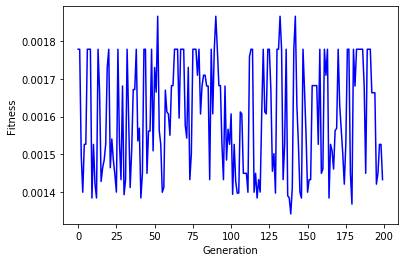

In [6]:
gen = []
fit = []
best_adaptation = 0
best_match = []

for generation in range(num_generations):
    # Obtener valores de adaptación de la población
    fitness = cal_pop_fitness(new_population)
    # Selección
    parents = select_mating_pool(new_population, fitness, num_parents_mating)
    
    parents = numpy.array(parents)
    
    # Cruza
    offspring_crossover = crossover(parents, offspring_size=(pop_size[0] - parents.shape[0]))
    
    # Mutación
    offspring_mutation = mutation(offspring_crossover)
    offspring_mutation = numpy.array(offspring_mutation)
    
    
    # Crear nueva población basada en los padres y los hijos
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    # Obtener mejor resultado para la generación
    fit.append(numpy.max(cal_pop_fitness(new_population)))
    print(numpy.max(cal_pop_fitness(new_population)))
    gen.append(generation)
    print(generation)
    """
    if best_adaptation < numpy.max(cal_pop_fitness(new_population)):
        best_adaptation = numpy.max(cal_pop_fitness(new_population))
        best_match = 
    """

#Obtener la mejor solución
fitness = cal_pop_fitness(new_population)
best_match_idx = numpy.where(fitness == numpy.max(fitness))
print("Mejor resultado : ", new_population[best_match_idx, :])
print("Adaptación del mejor resultado : ", fitness[best_match_idx[0][0]])
print("KM Recorridos", calc_km(new_population[best_match_idx, :]))

#Gráfico
fig, ax = plt.subplots()
ax.plot(gen, fit, 'b')
ax.set_ylabel('Fitness')
ax.set_xlabel('Generation')
plt.show()